In [1]:
import ot
import numpy as np
import matplotlib.pyplot as plt


# %%


def draw_points(first_set, second_set, coupling, *args, **kwargs):
    is_zero = coupling <= 1e-16
    zero_from_first = is_zero.all(axis=1)
    zero_from_second = is_zero.all(axis=1)

    plt.scatter(first_set[~zero_from_first][:, 0], first_set[~zero_from_first][:, 1], c='blue')
    plt.scatter(second_set[~zero_from_second][:, 0], second_set[~zero_from_second][:, 1], c='green')
    plt.scatter(first_set[zero_from_first][:, 0], first_set[zero_from_first][:, 1], c='black')
    plt.scatter(second_set[zero_from_second][:, 0], second_set[zero_from_second][:, 1], c='black')
    plt.show()

In [2]:
x1 = np.linspace(0, 0.2, num=100)
y1 = np.linspace(0, 0.2, num=100)
xx1, yy1 = np.meshgrid(x1, y1)
# %%
x2 = np.linspace(0.7, 1, num=100)
y2 = np.linspace(0.7, 1, num=100)
xx2, yy2 = np.meshgrid(x2, y2)
# %%
# first_set = np.stack((xx1.ravel(), yy1.ravel()), axis=1)

# second_set = np.stack((xx2.ravel(), yy2.ravel()), axis=1)

In [3]:
mask_1 = ((xx1 - 0.1)**2 + (yy1 - 0.1)**2 <= 0.01)
mask_2 = ((xx2 - 0.8)**2 + (yy2 - 0.8)**2 <= 0.02)

In [4]:
first_set = np.stack((xx1[mask_1], yy1[mask_1]), axis=1)
second_set = np.stack((xx2[mask_2], yy2[mask_2]), axis=1)
distance_matrix = ot.dist(first_set, second_set)
distance_matrix /= np.max(distance_matrix)

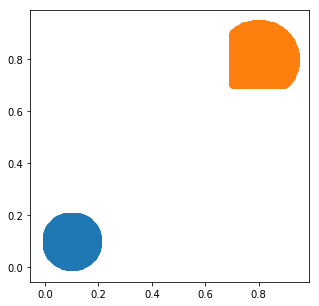

In [5]:
plt.figure(figsize=(5, 5))
plt.scatter(xx1[mask_1], yy1[mask_1])
plt.scatter(xx2[mask_2], yy2[mask_2])
plt.show()

In [39]:
a = np.ones(distance_matrix.shape[0]) / distance_matrix.shape[0]
b = np.ones(distance_matrix.shape[1]) / distance_matrix.shape[1]
# %%
coupling = ot.bregman.partial_transport(a, b, distance_matrix, reg=0.005, verbose=20, stopThr=1e-9, theta=1e-9, m=0.8, log=True)
print(coupling)

It.  |Err         
-------------------
    0|1.400488e-04|
    1|8.850210e-06|
    2|3.204477e-06|
    3|1.654286e-06|
    4|1.013888e-06|
    5|6.883633e-07|
    6|4.998621e-07|
    7|3.805272e-07|
    8|2.995865e-07|
    9|2.423126e-07|
   10|2.002533e-07|
   11|1.682411e-07|
   12|1.432957e-07|
   13|1.234614e-07|
   14|1.074638e-07|
   15|9.426492e-08|
   16|8.327378e-08|
   17|7.406371e-08|
   18|6.619991e-08|
   19|5.944417e-08|
It.  |Err         
-------------------
   20|5.365129e-08|
   21|4.858106e-08|
   22|4.412307e-08|
   23|4.020252e-08|
   24|3.674814e-08|
   25|3.367421e-08|
   26|3.092757e-08|
   27|2.846322e-08|
   28|2.624601e-08|
   29|2.424556e-08|
   30|2.244060e-08|
   31|2.081543e-08|
   32|1.933453e-08|
   33|1.798201e-08|
   34|1.674589e-08|
   35|1.562273e-08|
   36|1.461279e-08|
   37|1.367167e-08|
   38|1.280266e-08|
   39|1.202089e-08|
It.  |Err         
-------------------
   40|1.128747e-08|
   41|1.060510e-08|
   42|9.991222e-09|
   43|9.404694e-09|
   

In [40]:
p = coupling[0].sum(axis=1) / 0.7
q = coupling[0].sum(axis=0) / 0.7

In [51]:
(p >= 1e-6).mean()

0.8575899843505478

In [50]:
(q >= 1e-6).mean()

0.7676553672316384

In [12]:
def draw_points_1(threshold):
    zero_from_first = (p < threshold)
    zero_from_second = (q < threshold)

    plt.scatter(first_set[~zero_from_first][:, 0], first_set[~zero_from_first][:, 1], c='blue')
    plt.scatter(second_set[~zero_from_second][:, 0], second_set[~zero_from_second][:, 1], c='green')
    plt.scatter(first_set[zero_from_first][:, 0], first_set[zero_from_first][:, 1], c='black')
    plt.scatter(second_set[zero_from_second][:, 0], second_set[zero_from_second][:, 1], c='black')
    plt.show()

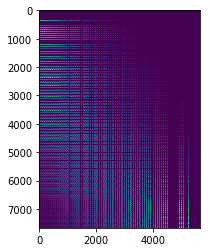

In [13]:
plt.imshow(coupling[0])

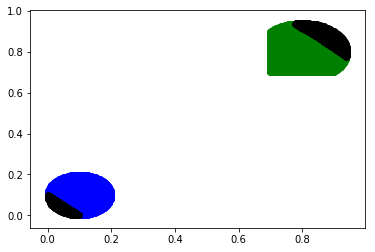

In [26]:
draw_points_1(threshold=1e-9)